In [1]:
include("../analysis/mESC/load_analysis.jl")
include("../analysis/mESC/filter_by_correlation.jl");

E:\1_WORK\Caowenjie\CellCycle-RNAseq-main\analysis\mESC
Julia Version 1.10.4
Commit 48d4fd4843 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 16 × Intel(R) Core(TM) i7-10700 CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
Threads: 1 default, 0 interactive, 1 GC (on 16 virtual cores)
Environment:
  JULIA_DEPOT_PATH = E:\Cache\julia

1333 cells in G1
2240 cells in S
2113 cells in G2M


sys:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead


Cut off 392 cells in G1
Considering 3882 genes out of 11544 in total
3054 cells in the merged (G1 + G2M) dataset
Shared genes: 1669
Removed 132 genes with r < 0.
1537 genes left remaining.


In [2]:
cx1 = colorant"#0098D1"
cx2 = colorant"#8790fd"
cx3 = colorant"#f07269";

# Fig. 4B: $\lambda$-dependent vs $\lambda$-independent (5 example genes)

In [3]:
burst_freqs_G1_th_dep = get_burst_frequency.(G1_th_dep_fits)
burst_freqs_G2M_th_dep = get_burst_frequency.(G2M_th_dep_fits)
burst_freqs_G1_th_ind = get_burst_frequency.(G1_th_ind_fits)
burst_freqs_G2M_th_ind = get_burst_frequency.(G2M_th_ind_fits);

In [4]:
burst_sizes_G1_th_dep = get_burst_size.(G1_th_dep_fits, Ref(thetaG1))
burst_sizes_G2M_th_dep = get_burst_size.(G2M_th_dep_fits, Ref(thetaG2M))
burst_sizes_G1_th_ind = get_burst_size.(G1_th_ind_fits)
burst_sizes_G2M_th_ind = get_burst_size.(G2M_th_ind_fits);

In [5]:
ratio_f_G1 = burst_freqs_G1_th_dep ./ burst_freqs_G1_th_ind
ratio_f_G2M = burst_freqs_G2M_th_dep ./ burst_freqs_G2M_th_ind
ratio_b_G1 = burst_sizes_G1_th_dep ./ burst_sizes_G1_th_ind
ratio_b_G2M = burst_sizes_G2M_th_dep ./ burst_sizes_G2M_th_ind;

In [6]:
genes = ["Psmd12", "Lmnb1", "Top2a", "Jade1", "Rpl14"]
inds = [findfirst(gene_names .== gene) for gene in genes];

In [7]:
CI_ratio_f_G1 = @time get_ratio_confidence_intervals(G1_th_ind_fits[inds], xG1[inds], nothing, 2,
                                                     G1_th_dep_fits[inds], xG1[inds], thetaG1, 2,
                                                     get_burst_frequency_ratio_CI_PL)
CI_ratio_f_G2M = @time get_ratio_confidence_intervals(G2M_th_ind_fits[inds], xG2M[inds], nothing, 4,
                                                      G2M_th_dep_fits[inds], xG2M[inds], thetaG2M, 4,
                                                      get_burst_frequency_ratio_CI_PL);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

 22.229319 seconds (36.04 M allocations: 5.310 GiB, 7.65% gc time, 78.26% compilation time: <1% of which was recompilation)
  2.146460 seconds (266.75 k allocations: 830.130 MiB, 12.99% gc time)


In [8]:
CI_ratio_b_G1 = @time get_ratio_confidence_intervals(G1_th_ind_fits[inds], xG1[inds], nothing, 2,
                                                     G1_th_dep_fits[inds], xG1[inds], thetaG1, 2,
                                                     get_burst_size_ratio_CI_PL)
CI_ratio_b_G2M = @time get_ratio_confidence_intervals(G2M_th_ind_fits[inds], xG2M[inds], nothing, 4,
                                                      G2M_th_dep_fits[inds], xG2M[inds], thetaG2M, 4,
                                                      get_burst_size_ratio_CI_PL);

 13.650389 seconds (12.29 M allocations: 3.805 GiB, 8.09% gc time, 65.77% compilation time)
  2.096075 seconds (276.35 k allocations: 837.040 MiB, 10.85% gc time)


In [9]:
f = Figure(size = (size_pt[1]*0.9, size_pt[2]*1.5), figure_padding = 1)
ga = f[1,1] = GridLayout()

ax = Axis(ga[1,1],
          xlabel="", ylabel="Burst frequency ratio", xticklabelsvisible=false)
x = 1:length(genes)
ax.xticks = (x, genes)

y1 = ratio_f_G1[inds]
y2 = ratio_f_G2M[inds]
y1_lb = first.(CI_ratio_f_G1)
y2_lb = first.(CI_ratio_f_G2M)
y1_ub = last.(CI_ratio_f_G1)
y2_ub = last.(CI_ratio_f_G2M)
hlines!(ax, 1, color=(:black, 0.5), linestyle=:dash)
scatter!(ax, x, y1, markersize=7, color=(c1, 0.95))
scatter!(ax, x, y2, markersize=7, color=(c2, 0.95))
errorbars!(ax, x, y1, y1 .- y1_lb, y1_ub .- y1, whiskerwidth=5, color=(c1, 0.95))
errorbars!(ax, x, y2, y2 .- y2_lb, y2_ub .- y2, whiskerwidth=5, color=(c2, 0.95))
ylims!(ax, (nothing, 2.2))

ax = Axis(ga[2,1],
          xlabel="", ylabel="Burst size ratio")
x = 1:length(genes)
ax.xticks = (x, genes)

y1 = ratio_b_G1[inds]
y2 = ratio_b_G2M[inds]
y1_lb = first.(CI_ratio_b_G1)
y2_lb = first.(CI_ratio_b_G2M)
y1_ub = last.(CI_ratio_b_G1)
y2_ub = last.(CI_ratio_b_G2M)
hlines!(ax, 1, color=(:black, 0.5), linestyle=:dash)

scatter!(ax, x, y1, markersize=7, color=(c1, 0.95))
scatter!(ax, x, y2, markersize=7, color=(c2, 0.95))
errorbars!(ax, x, y1, y1 .- y1_lb, y1_ub .- y1, whiskerwidth=5, color=(c1, 0.95))
errorbars!(ax, x, y2, y2 .- y2_lb, y2_ub .- y2, whiskerwidth=5, color=(c2, 0.95))

rowgap!(ga, 3)

In [10]:
f

In [11]:
#save("../data/mESC/figures/4B_bf_ratios.pdf", f, pt_per_unit = 1);

# Fig. 4C: $\lambda$-dependent and $\lambda$-independent (all genes)

In [12]:
f = Figure(size = (size_pt[1]*0.9, size_pt[2]*1.7), figure_padding = 1)
ga = f[1,1] = GridLayout()

y1 = ratio_f_G1; x1 = fill("G1", length(y1))
y2 = ratio_f_G2M; x2 = fill("G2/M", length(y2));
ax = Axis(ga[1, 1]; xlabel="Burst frequency ratio", ylabel="")
rainclouds!(ax, vcat(x1, x2), vcat(y1, y2), gap=-0.7,
            orientation = :horizontal,
            color = vcat(fill(c1, length(y1)), fill(c2, length(y2))),
            cloud_width=0.9, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
            boxplot_width=0.1, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
            jitter_width=0.2, markersize=1.3, side_nudge=0.12)
vlines!(1, color=(:black, 0.5), linestyle=:dash)
xlims!(0.88, 1.6)

y1 = ratio_b_G1; x1 = fill("G1", length(y1))
y2 = ratio_b_G2M; x2 = fill("G2/M", length(y2));
ax = Axis(ga[2, 1]; xlabel="Burst size ratio", ylabel="")
rainclouds!(ax, vcat(x1, x2), vcat(y1, y2), gap=-0.7,
            orientation = :horizontal,
            color = vcat(fill(c1, length(y1)), fill(c2, length(y2))),
            cloud_width=0.9, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
            boxplot_width=0.1, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
            jitter_width=0.2, markersize=1.3, side_nudge=0.12)
vlines!(1, color=(:black, 0.5), linestyle=:dash)
xlims!(0.6, 1.15)

rowgap!(ga, 7)

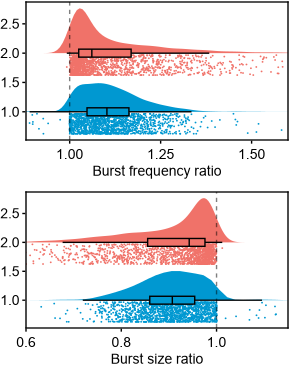

In [13]:
f

In [14]:
#save("../data/mESC/figures/4C_bf_ratios.pdf", f, pt_per_unit = 1);

# Fig 4D: G2/M vs G1

In [15]:
ratio_f_th_dep = burst_freqs_G2M_th_dep ./ burst_freqs_G1_th_dep
ratio_b_th_dep = burst_sizes_G2M_th_dep ./ burst_sizes_G1_th_dep
ratio_f_th_ind = burst_freqs_G2M_th_ind ./ burst_freqs_G1_th_ind
ratio_b_th_ind = burst_sizes_G2M_th_ind ./ burst_sizes_G1_th_ind;

In [16]:
@show median(ratio_f_th_dep)
@show quantile(ratio_f_th_dep, 0.25)
@show quantile(ratio_f_th_dep, 0.75);

median(ratio_f_th_dep) = 0.4900969409640096
quantile(ratio_f_th_dep, 0.25) = 0.42856192891309935
quantile(ratio_f_th_dep, 0.75) = 0.5628171704854321


In [17]:
@show median(ratio_b_th_dep)
@show quantile(ratio_b_th_dep, 0.25)
@show quantile(ratio_b_th_dep, 0.75);

median(ratio_b_th_dep) = 1.4324584666615052
quantile(ratio_b_th_dep, 0.25) = 1.225607459238396
quantile(ratio_b_th_dep, 0.75) = 1.6098495123012424


In [18]:
f = Figure(size = (size_pt[1]*0.9, size_pt[2]*1.7), figure_padding = 1)
ga = f[1, 1] = GridLayout()

# age-dependent
y1 = ratio_f_th_dep; x1 = fill("f", length(y1))
y2 = ratio_b_th_dep; x2 = fill("b", length(y2))
ax = Axis(ga[1, 1]; xlabel="Ratio", ylabel="")
rainclouds!(ax, vcat(x2, x1), vcat(y2, y1), gap=-1.8,
            orientation = :horizontal,
            color = vcat(fill(c1, length(y1)), fill(c2, length(y2))),
            cloud_width=0.9, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
            boxplot_width=0.08, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
            jitter_width=0.15, markersize=1.3, side_nudge=0.09)
vlines!(1, color=(:black, 0.5), linestyle=:dash)
xlims!(0, 2.5)

# age-independent for comparison
y1 = ratio_f_th_ind; x1 = fill("f", length(y1))
y2 = ratio_b_th_ind; x2 = fill("b", length(y2))
ax = Axis(ga[2, 1]; xlabel="Ratio", ylabel="")
rainclouds!(ax, vcat(x2, x1), vcat(y2, y1), gap=-1.8,
            orientation = :horizontal,
            color = vcat(fill(c1, length(y1)), fill(c2, length(y2))),
            cloud_width=0.9, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
            boxplot_width=0.08, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
            jitter_width=0.15, markersize=1.3, side_nudge=0.09)
vlines!(1, color=(:black, 0.5), linestyle=:dash)
xlims!(0, 2.5)

rowgap!(ga, 7)

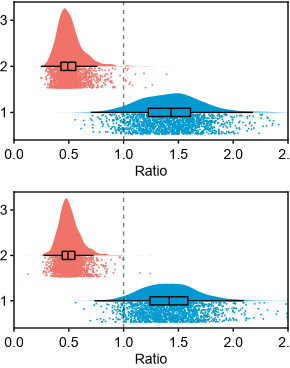

In [19]:
f

In [20]:
#save("../data/mESC/figures/4D_top.pdf", f, pt_per_unit = 1);

#### Age-corrected burst size

In [21]:
burst_sizes_G1_agecorr = get_burst_size.(G1_th_dep_fits, Ref(zeros(ngenes)))
burst_sizes_G2M_agecorr = get_burst_size.(G2M_th_dep_fits, Ref(zeros(ngenes)))
ratio_b_agecorr = burst_sizes_G2M_agecorr ./ burst_sizes_G1_agecorr;

In [22]:
median(ratio_b_agecorr)

1.0232670537461315

In [23]:
# same but the upper raincloud is for λ-independent fits
f = Figure(size = (size_pt[1]*0.9, size_pt[2]*0.8), figure_padding = 1)
ga = f[1, 1] = GridLayout()

y = ratio_b_agecorr; x = fill("Q_b", length(y1))
ax = Axis(ga[1, 1]; xlabel="Burst size ratio", ylabel="")
rainclouds!(ax, x, y, gap=-0.7,
            orientation = :horizontal,
            color = fill(cx2, length(y)),
            cloud_width=0.9, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
            boxplot_width=0.1, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
            jitter_width=0.2, markersize=1.3, side_nudge=0.12)
vlines!(1, color=(:black, 0.5), linestyle=:dash)
#xlims!(0.88, 1.6)

Plot{Makie.vlines, Tuple{Int64}}

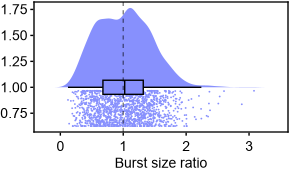

In [24]:
f

In [25]:
f = Figure(size = (size_pt[1]*0.9, size_pt[2]*1.7), figure_padding = 1)
ga = f[1, 1] = GridLayout()

y1 = ratio_f_th_dep; x1 = fill("f", length(y1))
y2 = ratio_b_th_dep; x2 = fill("b", length(y2))
ax = Axis(ga[1, 1]; xlabel="Ratio", ylabel="")
rainclouds!(ax, vcat(x2, x1), vcat(y2, y1), gap=-1.8,
            orientation = :horizontal,
            color = vcat(fill(c1, length(y1)), fill(c2, length(y2))),
            cloud_width=0.9, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
            boxplot_width=0.08, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
            jitter_width=0.15, markersize=1.3, side_nudge=0.09)
vlines!(1, color=(:black, 0.5), linestyle=:dash)
xlims!(0, 2.5)

y = ratio_b_agecorr; x = fill("b", length(y1))
ax = Axis(ga[2, 1]; xlabel="Ratio", ylabel="")
rainclouds!(ax, x, y, gap=-0.7,
            orientation = :horizontal,
            color = fill(c1, length(y)),
            cloud_width=0.5, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
            boxplot_width=0.04, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
            jitter_width=0.1, markersize=1.3, side_nudge=0.068)
vlines!(1, color=(:black, 0.5), linestyle=:dash)
xlims!(0, 2.5)

rowgap!(ga, 7)

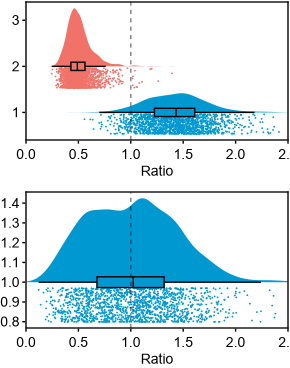

In [26]:
f

In [27]:
#save("../data/mESC/figures/Fig4D_bottom.pdf", f, pt_per_unit = 1);

# Fig 4E: binomial capture

In [28]:
p_avg = 0.3
v = 100.0
α = p_avg*v
β = (1-p_avg)*v
d_p = Beta(α, β);

In [29]:
f = Figure(size = (size_pt[1]*1, size_pt[2]*1), figure_padding = 1)
ax = Axis(f[1,1], xlabel="x", ylabel="pdf")
xs = 0:0.001:1
ys = pdf.(d_p, xs)
lines!(ax, xs, ys)
scatter!(ax, xs, ys; markersize=0.1)
@show α
@show β
@show mean(d_p)
f

α = 30.0
β = 70.0
mean(d_p) = 0.3


In [30]:
@show mean(d_p)
@show std(d_p)/mean(d_p);

mean(d_p) = 0.3
std(d_p) / mean(d_p) = 0.1519944414477816


In [31]:
transcription_rate_ind(::NegativeBinomialTheta) = 2 # b ind
transcription_rate_ind(::BetaPoisson) = 3 # ρ ind
transcription_rate_ind(::BetaPoissonTheta) = 3 # ρ ind
rescale_transcription(d::NegativeBinomial) = NegativeBinomial(d.r, 1/(1 + get_burst_size(d)/p_avg))

function rescale_transcription(d::ZI)
    dist_rescaled = rescale_transcription(d.dist)
    ZI(d.p0, dist_rescaled)    
end

function rescale_transcription(d::Distribution)
    ind = transcription_rate_ind(d)
    ps = collect(Distributions.params(d))
    ps[ind] = ps[ind] / p_avg   
    extract_dtype(d)(ps...)
end

convert_dist_gen(d::NegativeBinomialTheta, θ) = NegativeBinomial(d, θ)
convert_dist_gen(d::BetaPoissonTheta, θ) = BetaPoisson(d, θ)
convert_dist_gen(d::ZI{DT}, θ) where DT = MixtureModel([Dirac(0.0), convert_dist_gen(d.dist, θ)], [d.p0, one(d.p0)-d.p0]) 

function Distributions.rand(rng::AbstractRNG, d::MixtureModel, n::Int)
    # otherwise default rand() tends to crash
    return [rand(rng, d) for i in 1:n]
end

function Distributions.rand(rng::AbstractRNG, d::BetaPoisson)
    return rand(rng, Poisson(d.ρ * rand(rng, Beta(d.σ_on, d.σ_off))))
end

function Distributions.rand(rng::AbstractRNG, d::ZI)
    return rand(rng, MixtureModel([Dirac(0.0), d.dist], [d.p0, one(d.p0)-d.p0]))
end

function count_generator(d::DiscreteUnivariateDistribution, theta::AbstractArray, nconv::Int, rng::AbstractRNG)

    # θ-dependent case
    θs = sort(unique(theta))
    xtheta = Vector{eltype(θs)}(undef, 0)
    n_θs = zeros(Int, length(θs))
    for i in eachindex(θs)
        θ = θs[i]
        n = count(θ .== theta)
        n_θs[i] = n
        append!(xtheta, fill(θ, n))
    end
    
    # Count generator for each cell
    function generate_counts()
        counts = Int[]
        for i in eachindex(n_θs)
            θ = θs[i]
            n = n_θs[i]
            # transform into θ-independent model
            _d = convert_dist_gen(d, θ)
            _counts = sum(rand(rng, _d, n) for i in 1:nconv)
            append!(counts, _counts)
        end
        counts
    end

    xtheta, generate_counts

end

function count_generator(d::DiscreteUnivariateDistribution, ndata::Int, nconv::Int, rng::AbstractRNG)

    # θ-independent case
    
    # Set up a mixture model for sampling in case we have a zero-inflated distribution 
    _d = d isa ZI ? MixtureModel([Dirac(0), d.dist], [d.p0, one(d.p0)-d.p0]) : d
    println(_d)
    
    # Count generator for each cell
    function generate_counts()
        counts = sum(rand(rng, _d, ndata) for i in 1:nconv)
        counts
    end

    nothing, generate_counts

end

function generate_downsampled_counts(d::DiscreteUnivariateDistribution, theta::AbstractArray, ps::AbstractArray, nconv::Int, rng::AbstractRNG)
    
    # Given the count distribution d, the θ values associated with each cell, and the capture efficiency distribution d_p,
    # sample nconv numbers from d and sum them together to get the sampled mRNA counts per cell

    ncells = length(theta)
    #alter the transcription rate
    d = rescale_transcription(d)
    xtheta, generate_counts = is_th_dep(d) ? count_generator(d, theta, nconv, rng) : count_generator(d, ncells, nconv, rng)
    counts = generate_counts()
    
    binomial_ds = Binomial.(counts, ps)
    downsampled_counts = rand.(binomial_ds)
    
    counts, xtheta, downsampled_counts
    
end

function fit_downsampled_mle(d::DiscreteUnivariateDistribution, theta::AbstractArray, ps::AbstractArray, nconv::Int,
                             rng::AbstractRNG; kwargs...)
    dtype = extract_dtype(d)
    _, xtheta, xcounts = generate_downsampled_counts(d, theta, ps, nconv, rng)
    xfit = fit_mle(dtype, xcounts, xtheta; nconv, kwargs...)
    xfit
end
    
function get_downsampled_ratios(d1::DiscreteUnivariateDistribution, theta1::AbstractArray, ps1::AbstractArray, nconv1::Int,
                                d2::DiscreteUnivariateDistribution, theta2::AbstractArray, ps2::AbstractArray, nconv2::Int,
                                rng::AbstractRNG; kwargs...)

    xfit1 = fit_downsampled_mle(d1, theta1, ps1, nconv1, rng; kwargs...)
    xfit2 = fit_downsampled_mle(d2, theta2, ps2, nconv2, rng; kwargs...)

    f1 = get_burst_frequency(xfit1)
    f2 = get_burst_frequency(xfit2)
    b1 = get_burst_size(xfit1, theta1)
    b2 = get_burst_size(xfit2, theta2)
    
    ratio_f = f2 / f1
    ratio_b = b2 / b1
    
    ratio_f, ratio_b
    
end

get_downsampled_ratios (generic function with 1 method)

In [32]:
Q1_rf = quantile(ratio_f_th_dep, 0.25)
Q3_rf = quantile(ratio_f_th_dep, 0.75)
Q1_rb = quantile(ratio_b_th_dep, 0.25)
Q3_rb = quantile(ratio_b_th_dep, 0.75);

In [33]:
inds_rf = findall(Q1_rf .<= ratio_f_th_dep .<= Q3_rf) 
inds_rb = findall(Q1_rb .<= ratio_b_th_dep .<= Q3_rb)
inds_fit = findall(isNB.(G1_th_dep_fits) .& isNB.(G2M_th_dep_fits))
inds = intersect(inds_rf, inds_rb, inds_fit);

In [34]:
rng = MersenneTwister(1234)
ps_G1 = rand(rng, d_p, length(thetaG1))
ps_G2M = rand(rng, d_p, length(thetaG2M))
inds = shuffle(rng, inds)[1:200];

In [35]:
nsamples = 100

nconvG1 = 2
nconvG2M = 4
vec_ratios_f = []
vec_ratios_b = []
for ind in inds
    println("gene $ind")
    dG1 = G1_th_dep_fits[ind]
    dG2M = G2M_th_dep_fits[ind]
    ratios_f = zeros(nsamples)
    ratios_b = zeros(nsamples)
    
    @time Threads.@threads for i in 1:nsamples
        try
            ratios_f[i], ratios_b[i] = get_downsampled_ratios(dG1, thetaG1, ps_G1, nconvG1, 
                                                              dG2M, thetaG2M, ps_G2M, nconvG2M, 
                                                              rng, maxtime=60.0, error_check=true)
        catch e
            println(e)
        end
    end
    
    push!(vec_ratios_f, ratios_f)
    push!(vec_ratios_b, ratios_b)
end

gene 747
1196.330126 seconds (432.88 M allocations: 171.041 GiB, 1.69% gc time, 0.51% compilation time: <1% of which was recompilation)
gene 1227
604.647507 seconds (584.31 M allocations: 100.967 GiB, 2.00% gc time)
gene 1105
418.699240 seconds (441.92 M allocations: 72.357 GiB, 2.06% gc time)
gene 608
801.665119 seconds (628.86 M allocations: 127.952 GiB, 1.89% gc time)
gene 1353
486.450073 seconds (616.97 M allocations: 88.235 GiB, 2.24% gc time)
gene 1488
7214.262980 seconds (380.57 M allocations: 732.308 GiB, 2.88% gc time)
gene 982
1012.388051 seconds (475.64 M allocations: 109.119 GiB, 1.95% gc time)
gene 576
808.520922 seconds (433.08 M allocations: 96.205 GiB, 1.92% gc time)
gene 1255
1901.215749 seconds (445.12 M allocations: 216.671 GiB, 1.76% gc time)
gene 924
683.593517 seconds (584.19 M allocations: 100.002 GiB, 2.12% gc time)
gene 337
286.992317 seconds (517.06 M allocations: 60.291 GiB, 2.76% gc time)
gene 534
662.150580 seconds (411.74 M allocations: 86.512 GiB, 2.10% g

In [36]:
#@save datapath*"Fig4E_vec_ratios.jld2" inds vec_ratios_f vec_ratios_b

In [37]:
@load datapath*"Fig4E_vec_ratios.jld2" inds vec_ratios_f vec_ratios_b;

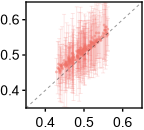

In [38]:
xi = 0.35; xf = 0.65

f = Figure(size = (size_pt[1]*0.45, size_pt[2]*0.6), figure_padding = 1)
ax = Axis(f[1,1], xticks=(0:0.1:xf), yticks=(0:0.1:0.6))

x = ratio_f_th_dep[inds]
y = mean.(vec_ratios_f)
y_err = std.(vec_ratios_f)
errorbars!(ax, x, y, y_err, y_err, whiskerwidth=2, linewidth=0.4, color=(c2, 0.2), direction=:y)
scatter!(ax, x, y, markersize=2, color=(c2, 0.5))

lines!(ax, 0:0.001:xf, 0:0.001:xf, color=(:black, 0.4), linestyle=:dash, linewidth=0.5)
xlims!(ax, xi, xf)
ylims!(ax, xi, xf)

f

In [39]:
save("../data/mESC/fig4E_f.pdf", f, pt_per_unit = 1);

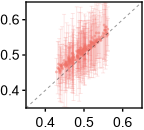

In [40]:
xi = 0.35; xf = 0.65

f = Figure(size = (size_pt[1]*0.45, size_pt[2]*0.6), figure_padding = 1)
ax = Axis(f[1,1], xticks=(0:0.1:xf), yticks=(0:0.1:0.6))

x = ratio_f_th_dep[inds]
y = mean.(vec_ratios_f)
y_err = std.(vec_ratios_f)
errorbars!(ax, x, y, y_err, y_err, whiskerwidth=2, linewidth=0.4, color=(c2, 0.2), direction=:y)
scatter!(ax, x, y, markersize=2, color=(c2, 0.5))

lines!(ax, 0:0.001:xf, 0:0.001:xf, color=(:black, 0.4), linestyle=:dash, linewidth=0.5)
xlims!(ax, xi, xf)
ylims!(ax, xi, xf)

f

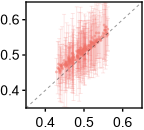

In [41]:
xi = 0.35; xf = 0.65

f = Figure(size = (size_pt[1]*0.45, size_pt[2]*0.6), figure_padding = 1)
ax = Axis(f[1,1], xticks=(0:0.1:xf), yticks=(0:0.1:0.6))

x = ratio_f_th_dep[inds]
y = mean.(vec_ratios_f)
y_err = std.(vec_ratios_f)
errorbars!(ax, x, y, y_err, y_err, whiskerwidth=2, linewidth=0.4, color=(c2, 0.2), direction=:y)
scatter!(ax, x, y, markersize=2, color=(c2, 0.5))

lines!(ax, 0:0.001:xf, 0:0.001:xf, color=(:black, 0.4), linestyle=:dash, linewidth=0.5)
xlims!(ax, xi, xf)
ylims!(ax, xi, xf)

f

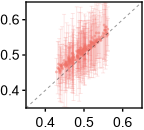

In [42]:
xi = 0.35; xf = 0.65

f = Figure(size = (size_pt[1]*0.45, size_pt[2]*0.6), figure_padding = 1)
ax = Axis(f[1,1], xticks=(0:0.1:xf), yticks=(0:0.1:0.6))

x = ratio_f_th_dep[inds]
y = mean.(vec_ratios_f)
y_err = std.(vec_ratios_f)
errorbars!(ax, x, y, y_err, y_err, whiskerwidth=2, linewidth=0.4, color=(c2, 0.2), direction=:y)
scatter!(ax, x, y, markersize=2, color=(c2, 0.5))

lines!(ax, 0:0.001:xf, 0:0.001:xf, color=(:black, 0.4), linestyle=:dash, linewidth=0.5)
xlims!(ax, xi, xf)
ylims!(ax, xi, xf)

f

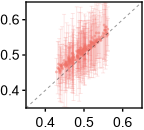

In [43]:
xi = 0.35; xf = 0.65

f = Figure(size = (size_pt[1]*0.45, size_pt[2]*0.6), figure_padding = 1)
ax = Axis(f[1,1], xticks=(0:0.1:xf), yticks=(0:0.1:0.6))

x = ratio_f_th_dep[inds]
y = mean.(vec_ratios_f)
y_err = std.(vec_ratios_f)
errorbars!(ax, x, y, y_err, y_err, whiskerwidth=2, linewidth=0.4, color=(c2, 0.2), direction=:y)
scatter!(ax, x, y, markersize=2, color=(c2, 0.5))

lines!(ax, 0:0.001:xf, 0:0.001:xf, color=(:black, 0.4), linestyle=:dash, linewidth=0.5)
xlims!(ax, xi, xf)
ylims!(ax, xi, xf)

f

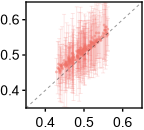

In [44]:
xi = 0.35; xf = 0.65

f = Figure(size = (size_pt[1]*0.45, size_pt[2]*0.6), figure_padding = 1)
ax = Axis(f[1,1], xticks=(0:0.1:xf), yticks=(0:0.1:0.6))

x = ratio_f_th_dep[inds]
y = mean.(vec_ratios_f)
y_err = std.(vec_ratios_f)
errorbars!(ax, x, y, y_err, y_err, whiskerwidth=2, linewidth=0.4, color=(c2, 0.2), direction=:y)
scatter!(ax, x, y, markersize=2, color=(c2, 0.5))

lines!(ax, 0:0.001:xf, 0:0.001:xf, color=(:black, 0.4), linestyle=:dash, linewidth=0.5)
xlims!(ax, xi, xf)
ylims!(ax, xi, xf)

f

In [45]:
#save("../data/mESC/figures/fig4E_f.pdf", f, pt_per_unit = 1);

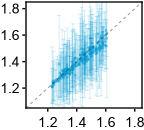

In [46]:
xi = 1.05; xf = 1.85

f = Figure(size = (size_pt[1]*0.45, size_pt[2]*0.6), figure_padding = 1)
ax = Axis(f[1,1], xticks=(0:0.2:xf), yticks=(0:0.2:xf))

x = ratio_b_th_dep[inds]
y = mean.(vec_ratios_b)
y_err = std.(vec_ratios_b)
errorbars!(ax, x, y, y_err, y_err, whiskerwidth=2, linewidth=0.4, color=(c1, 0.2), direction=:y)
scatter!(ax, x, y, markersize=2, color=(c1, 0.5))

lines!(ax, 0:0.001:xf, 0:0.001:xf, color=(:black, 0.4), linestyle=:dash, linewidth=0.5)
xlims!(ax, xi, xf)
ylims!(ax, xi, xf)

f

In [47]:
save("../data/mESC/fig4E_b.pdf", f, pt_per_unit = 1);

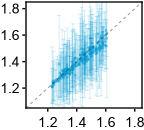

In [48]:
xi = 1.05; xf = 1.85

f = Figure(size = (size_pt[1]*0.45, size_pt[2]*0.6), figure_padding = 1)
ax = Axis(f[1,1], xticks=(0:0.2:xf), yticks=(0:0.2:xf))

x = ratio_b_th_dep[inds]
y = mean.(vec_ratios_b)
y_err = std.(vec_ratios_b)
errorbars!(ax, x, y, y_err, y_err, whiskerwidth=2, linewidth=0.4, color=(c1, 0.2), direction=:y)
scatter!(ax, x, y, markersize=2, color=(c1, 0.5))

lines!(ax, 0:0.001:xf, 0:0.001:xf, color=(:black, 0.4), linestyle=:dash, linewidth=0.5)
xlims!(ax, xi, xf)
ylims!(ax, xi, xf)

f

In [49]:
#save("../data/mESC/figures/fig4E_b.pdf", f, pt_per_unit = 1);